In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json
import pandas as pd
from glob import glob
import nltk
from nltk.corpus import stopwords
import string


In [2]:
df_business = pd.read_csv("yelp_business.csv")

In [3]:
df_review = pd.read_csv("yelp_review.csv")

In [4]:
df_business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [5]:
df_business.drop("neighborhood", axis = 1, inplace =True)

In [6]:
df_business.dropna(inplace = True)

In [7]:
df_review=df_review.rename(columns = {'stars':'review_rating'})

In [8]:
df_review.head()

,review_id,user_id,business_id,review_rating,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [9]:
df_review.dropna(inplace = True)

In [10]:
temp_df=df_review.groupby("business_id")["review_id"].count().reset_index()


In [11]:
temp_df=temp_df[temp_df['review_id']>70]
temp_df.set_index('business_id')
temp_df.head()

,business_id,review_id
4,--9e1ONYQuAa-CB_Rrw7Tw,1451
9,--FBCX-N37CMYDfs790Bnw,108
12,--I7YYLada0tSLkORTHb5Q,72
28,--cZ6Hhc9F7VkKXxHMVZSQ,318
51,-01XupAWZEXbdNbxNg5mEg,77


Text(0, 0.5, 'Count of Restaurants')

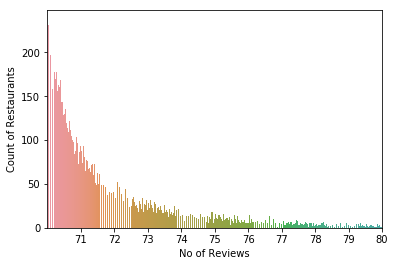

In [12]:
import seaborn as sns
%matplotlib inline
axes = sns.countplot(temp_df['review_id'])
axes.set_xlim([0,500])
plt.xticks([50,100,150,200,250,300,350,400,450,500])
plt.xlabel("No of Reviews")
plt.ylabel("Count of Restaurants")


In [13]:
df_review=df_review[df_review['business_id'].isin(temp_df['business_id'])]

In [14]:
df_review.shape

(3140499, 9)

In [15]:
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""","""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""","""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""","""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""","""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [16]:
df_business["categories"]=df_business["categories"].str.split(";")

In [17]:
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""","""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,"[Dentists, General Dentistry, Health & Medical..."
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""","""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,"[Hair Stylists, Hair Salons, Men's Hair Salons..."
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""","""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,"[Departments of Motor Vehicles, Public Service..."
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""","""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,"[Sporting Goods, Shopping]"
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,"[American (New), Nightlife, Bars, Sandwiches, ..."


In [18]:
df_new=df_business.copy()
df_new.shape

(173941, 12)

In [19]:
def is_restaurant(cat):
    return ('Restaurants' in cat)
      
df_business['is_restaurant']=df_business['categories'].apply(is_restaurant)
df_business=df_business[df_business['is_restaurant']]
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,is_restaurant
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,"[American (New), Nightlife, Bars, Sandwiches, ...",True
5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""","""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,"[Italian, Restaurants]",True
10,XOSRcvtaKc_Q5H1SAzN20A,"""East Coast Coffee""","""737 West Pike St""",Houston,PA,15342,40.241548,-80.212815,4.5,3,0,"[Breakfast & Brunch, Gluten-Free, Coffee & Tea...",True
14,fNMVV_ZX7CJSDWQGdOM8Nw,"""Showmars Government Center""","""600 E 4th St""",Charlotte,NC,28202,35.221647,-80.839345,3.5,7,1,"[Restaurants, American (Traditional)]",True
15,l09JfMeQ6ynYs5MCJtrcmQ,"""Alize Catering""","""2459 Yonge St""",Toronto,ON,M4P 2H6,43.711399,-79.399339,3.0,12,0,"[Italian, French, Restaurants]",True


In [20]:
df_business.drop('is_restaurant',axis=1,inplace=True)
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,"[American (New), Nightlife, Bars, Sandwiches, ..."
5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""","""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,"[Italian, Restaurants]"
10,XOSRcvtaKc_Q5H1SAzN20A,"""East Coast Coffee""","""737 West Pike St""",Houston,PA,15342,40.241548,-80.212815,4.5,3,0,"[Breakfast & Brunch, Gluten-Free, Coffee & Tea..."
14,fNMVV_ZX7CJSDWQGdOM8Nw,"""Showmars Government Center""","""600 E 4th St""",Charlotte,NC,28202,35.221647,-80.839345,3.5,7,1,"[Restaurants, American (Traditional)]"
15,l09JfMeQ6ynYs5MCJtrcmQ,"""Alize Catering""","""2459 Yonge St""",Toronto,ON,M4P 2H6,43.711399,-79.399339,3.0,12,0,"[Italian, French, Restaurants]"


In [21]:
merged_df = pd.merge(df_business, df_review, left_on = ["business_id"], right_on = ["business_id"], how = "inner")

In [22]:
merged_df.shape

(2398341, 20)

In [23]:
merged_df["business_id"].value_counts()

4JNXUYY8wbaaDmk3BPzlWw    7362
RESDUcs7fIiihp38-d6_6g    7006
K7lWdNUhCbcnEvI0NhGewg    5951
cYwJA2A6I12KNkm2rtXd5g    5448
DkYS3arLOhA8si5uUEmHOw    4870
f4x1YBxkLrZg652xt2KR5g    4774
2weQS-RnoOBhb1KsHKyoSQ    4018
KskYqH1Bi7Z_61pH6Om8pg    3965
eoHdUeQDNgQ6WYEnP2aiRw    3911
ujHiaprwCQ5ewziu0Vi9rw    3836
iCQpiavjjPzJ5_3gPD5Ebg    3741
rcaPajgKOJC2vo_l3xa42A    3571
El4FC8jcawUVgw_0EIcbaQ    3445
hihud--QRriCYZw1zZvW4g    3264
7sPNbCx7vGAaH7SbNPZ6oA    3064
g8OnV26ywJlZpezdBnOWUQ    3051
XZbuPXdyA0ZtTu3AzqtQhg    3011
OETh78qcgDltvHULowwhJg    2933
P7pxQFqr7yBKMMI2J51udw    2771
XXW_OFaYQkkGOGniujZFHg    2700
HhVmDybpU7L50Kb5A0jXTg    2673
yfxDa8RFOvJPQh0rNtakHA    2595
3kdSl5mo9dWC4clrQjEDGg    2594
QJatAcxYgK1Zp9BRZMAx7g    2551
YJ8ljUhLsz6CtT_2ORNFmg    2502
NvKNe9DnQavC9GstglcBJQ    2490
RwMLuOkImBIqqYj4SSKSPg    2447
Cni2l-VKG_pdospJ6xliXQ    2440
faPVqws-x-5k2CQKDNtHxw    2361
G-5kEa6E6PD5fkBRuA7k9Q    2350
                          ... 
BJcKLX7QK0u2nbUTYM4sNA      71
COnqdubh

In [24]:
merged_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,review_id,user_id,review_rating,date,text,useful,funny,cool
0,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.47569,3.5,116,1,"[American (New), Nightlife, Bars, Sandwiches, ...",rnvu74aNIPn93Z9Ue11Epw,bgtr7jOlALe8ay4g7pnf4A,4,2016-05-05,I've always enjoyed my time at brick house foo...,0,0,0
1,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.47569,3.5,116,1,"[American (New), Nightlife, Bars, Sandwiches, ...",OE5dH664oSSK_-TvIl263w,ndZOHkG_FWdL4TRd9xRfNQ,2,2017-03-19,1st time here. Came w my Unc bc Louies was clo...,0,0,0
2,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.47569,3.5,116,1,"[American (New), Nightlife, Bars, Sandwiches, ...",SWeHmo8uHHWbbv94VdAMeQ,UqtE83J-6NMQNNJzpnWwEQ,1,2015-08-31,Worse service ever andI use to be a server so ...,0,0,0
3,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.47569,3.5,116,1,"[American (New), Nightlife, Bars, Sandwiches, ...",fCCL0pAgYGccUs8shHHIUA,PixAmdRa58XZ3hr8YLS36g,5,2015-10-09,I am updating my review to 5-stars because I t...,2,0,2
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.47569,3.5,116,1,"[American (New), Nightlife, Bars, Sandwiches, ...",-VOh0NNnIo1r24hjwSZL4Q,Hly0NEWXMxbuXa2zm_NJOQ,4,2015-01-15,I enjoyed this place. I went the night the Bu...,0,0,0


In [25]:
merged_df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'categories', 'review_id', 'user_id', 'review_rating', 'date', 'text',
       'useful', 'funny', 'cool'],
      dtype='object')

In [26]:
def has_offers(review):
    to_search=['offers','discount','deals']
    for word in to_search:
        if(word in review):
            return True
    return False

merged_df['OFFERS-DISCOUNTS']=merged_df['text'].apply(has_offers)
merged_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,categories,review_id,user_id,review_rating,date,text,useful,funny,cool,OFFERS-DISCOUNTS
0,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.47569,3.5,116,...,"[American (New), Nightlife, Bars, Sandwiches, ...",rnvu74aNIPn93Z9Ue11Epw,bgtr7jOlALe8ay4g7pnf4A,4,2016-05-05,I've always enjoyed my time at brick house foo...,0,0,0,False
1,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.47569,3.5,116,...,"[American (New), Nightlife, Bars, Sandwiches, ...",OE5dH664oSSK_-TvIl263w,ndZOHkG_FWdL4TRd9xRfNQ,2,2017-03-19,1st time here. Came w my Unc bc Louies was clo...,0,0,0,False
2,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.47569,3.5,116,...,"[American (New), Nightlife, Bars, Sandwiches, ...",SWeHmo8uHHWbbv94VdAMeQ,UqtE83J-6NMQNNJzpnWwEQ,1,2015-08-31,Worse service ever andI use to be a server so ...,0,0,0,False
3,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.47569,3.5,116,...,"[American (New), Nightlife, Bars, Sandwiches, ...",fCCL0pAgYGccUs8shHHIUA,PixAmdRa58XZ3hr8YLS36g,5,2015-10-09,I am updating my review to 5-stars because I t...,2,0,2,False
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.47569,3.5,116,...,"[American (New), Nightlife, Bars, Sandwiches, ...",-VOh0NNnIo1r24hjwSZL4Q,Hly0NEWXMxbuXa2zm_NJOQ,4,2015-01-15,I enjoyed this place. I went the night the Bu...,0,0,0,False


In [27]:
def is_date_spot(review):
    to_search=['romantic','couple','date','sex','tinder']
    for word in to_search:
        if(word in review):
            return True
    return False

merged_df['DATE SPOT']=merged_df['text'].apply(is_date_spot)


In [28]:
def is_sports(review):
    to_search=['sports','baseball','rugby','game','football']
    for word in to_search:
        if(word in review):
            return True
    return False

merged_df['SPORTS BAR']=merged_df['text'].apply(is_sports)


In [29]:
def is_waffle(review):
    to_search=['waffle']
    for word in to_search:
        if(word in review):
            return True
    return False

merged_df['WAFFLES']=merged_df['text'].apply(is_waffle)
merged_df[merged_df['WAFFLES']==True].shape

(31315, 24)

In [20]:
yelp_class = merged_df[(merged_df['state'] == "OH") ]

In [148]:
yelp_class.shape

(91570, 23)

In [21]:
def text_process(text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in text if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [150]:
print(text_process("Hey there! This is a sample review, which happens to contain punctuations."))

['Hey', 'sample', 'review', 'happens', 'contain', 'punctuations']


In [151]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
X = yelp_class['text']
y = yelp_class['review_rating']

In [153]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [154]:
print(len(bow_transformer.vocabulary_))

112651


In [156]:
X = bow_transformer.transform(X)

In [157]:
print('Shape of Sparse Matrix: ', X.shape)

Shape of Sparse Matrix:  (91570, 112651)


In [158]:
import pickle

In [159]:
filename = 'finalized_model.sav'
pickle.dump(bow_transformer, open(filename, 'wb'))

In [160]:
loaded_model = pickle.load(open(filename, 'rb'))

In [161]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [170]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [171]:
preds = nb.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[ 893  368  166   69   45]
 [ 300  496  601  272   73]
 [ 125  185  746 1174  223]
 [  52   55  231 2959 2033]
 [  31   28   64 1336 5789]]


             precision    recall  f1-score   support

          1       0.64      0.58      0.61      1541
          2       0.44      0.28      0.35      1742
          3       0.41      0.30      0.35      2453
          4       0.51      0.56      0.53      5330
          5       0.71      0.80      0.75      7248

avg / total       0.58      0.59      0.58     18314



In [30]:
import nltk, string
from sklearn.feature_extraction.text import TfidfVectorizer

#def cosine_sim(text1, text2):
#     tfidf = vectorizer.fit_transform([text1, text2])
#     return ((tfidf * tfidf.T).A)[0,1]
#print (cosine_sim(yelp_class['text'][103], yelp_class["text"][120]))
new_merged_df = merged_df.reset_index(drop=True)

In [31]:
#z is the series which has all the reviews 
z = merged_df["text"]
new_df = z.reset_index(drop=True)

In [32]:
#Tfidf Vectorizer
def tokens(x):
    return x.split(',')
from sklearn.feature_extraction.text import TfidfVectorizer
def get_vectorizer(train):
    vectorizer = TfidfVectorizer(stop_words ='english')
    X = vectorizer.fit_transform(train)
    return X, vectorizer
tfidf, vectorizer = get_vectorizer(new_df)

In [31]:
#Taking the input from the user
name = [input("What is your review about the restaurant")]

What is your review about the restaurantAwesome pizza


In [32]:
tfidf_name = vectorizer.transform(name)

In [33]:
#Calculating the cosine distance between the review entered by the user and the all the reviews in the dataset
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf_name, tfidf).flatten()
related_reviews_indices = cosine_similarities.argsort()[:-10:-1]
cosine_similarities[related_reviews_indices]

array([0.76252386, 0.71239309, 0.70593239, 0.69419362, 0.68876261,
       0.6765946 , 0.6721899 , 0.66515518, 0.66404939])

#The reviews that are similar to the review posted online
for indices in related_reviews_indices:
    print(new_df[indices])
    print("\n")

In [30]:
#Displaying the final restaurants that had similar reviews
new_merged_df["name"][related_reviews_indices]

1400150          "Grimaldi's Pizzeria"
2057803                 "Bistro Pizza"
2091951          "Rocco's NY Pizzeria"
1399922          "Grimaldi's Pizzeria"
114565     "La Grande Orange Pizzeria"
1042450                    "MOD Pizza"
2041379           "Nello's Pizza Mesa"
1703469                 "Mama Santa's"
1446282      "Blaze Fast Fire'd Pizza"
Name: name, dtype: object

In [96]:
import ipywidgets as widgets
from ipywidgets import interact, interactive
from IPython.display import display
from ipywidgets import link


def on_search(b):
    global output
    global query_entry
    
    output.clear_output()
    
    name = [query_entry.value]
    tfidf_name = vectorizer.transform(name)
    
    cosine_similarities = linear_kernel(tfidf_name, tfidf).flatten()
    related_reviews_indices = cosine_similarities.argsort()[:-10:-1]
    #cosine_similarities[related_reviews_indices]
    
    #for indices in related_reviews_indices:
    with output:
            
            print(new_merged_df.loc[list(related_reviews_indices),['name','city','text']])
                
            print("\n")
    
    
def on_datespot(b):
    global output
    global merged_df
    
    output.clear_output()
    
    with output: 
        for each in merged_df[merged_df['DATE SPOT']==True]['name'].unique():
            print('-----',each)
        
def on_sportsbar(b):
    global output
    global merged_df
    
    output.clear_output()
    
    with output: 
        for each in merged_df[merged_df['SPORTS BAR']==True]['name'].unique():
            print('-----',each)
        
def on_waffle(b):
    global output
    global merged_df
    
    output.clear_output()
    
    with output: 
        for each in merged_df[merged_df['WAFFLES']==True]['name'].unique():
            print('-----',each)
    

def on_offer(b):
    global output
    global merged_df
    
    output.clear_output()
    
    with output: 
        for each in merged_df[merged_df['OFFERS-DISCOUNTS']==True]['name'].unique():
            print('-----',each)
    
    
    
query_entry=widgets.Textarea(
    value='',
    placeholder='Type something',
    description='QUERY:',
    disabled=False
)



btn_datespot=widgets.Button(
    description='DATE SPOT',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon=''
)

btn_sportsbar=widgets.Button(
    description='SPORTS BAR',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon=''
)

btn_waffle=widgets.Button(
    description='WAFFLE',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon=''
)

btn_offers=widgets.Button(
    description='OFFERS/DISCOUNTS',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon=''
)










btn_search=widgets.Button(
    description='Search',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon=''
)

output = widgets.Output(layout={'border': '1px solid black'})


display(widgets.HBox((btn_datespot,btn_sportsbar,btn_waffle,btn_offers,query_entry,btn_search)))
print('\n\n')
display(output)
type(btn_search)

btn_search.on_click(on_search)
btn_datespot.on_click(on_datespot)
btn_sportsbar.on_click(on_sportsbar)
btn_waffle.on_click(on_waffle)
btn_offers.on_click(on_offer)



Output(layout=Layout(border='1px solid black'))

NameError: name 'df' is not defined

'efkcmnkfmncded'